# Applied Social Network Analysis in Python

## Chapter 1-2. Network Definition and Vocabulary 
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/network-definition-and-vocabulary-oQ60i)**

<hr>
Network (or Graph) : A representation of connections among a set of items.

- items are called nodes (or Vertices)
- connections ared called edges (or link or ties)

We will add edges to configure graph, but we only add edges, not nodes. <br>
The class `networkx.Graph()` will make nodes when you add vertices automatically

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

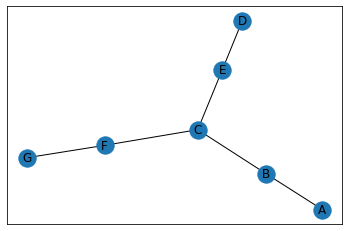

In [2]:
# Define of Graph Class
G = nx.Graph()

# make connections 
connection_list = [('B', 'A'), ('B', 'C'), ('C','F'), ('C','E'), ('E','D'), ('G', 'F')]

for n1, n2 in connection_list:
    G.add_edge(n1, n2)
    
# Drawing codes.
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# you can use only this one line,
nx.draw_networkx(G, pos)

# But If you need, then you can draw consists of networks one by one.
#nx.draw_networkx_nodes(G,pos)
#nx.draw_networkx_labels(G,pos)
#nx.draw_networkx_edges(G,pos)

#nx.draw_kamada_kawai(G) #???

plt.show()

### Diracted & Undirected Network 

Let's think about the people social networks, then a node can be a person and edge means friendship, marital, or family ties. Mostly **Symmetric relationships**.<br>
However, every relationship cannot be symmetric. Food chain is one of good example. Nodes is birds, Edges will be waht eats what. this relationship graph will be **Asymmetric Relationship**.

* **Undirected Network** : edges have no direction
* **Directed Network** : edges have direction

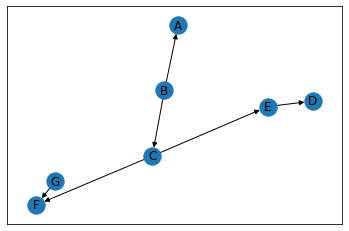

In [3]:
# Define of Directed Graph Class
G = nx.DiGraph()

# make connections using previous undirected network edges.
for n1, n2 in connection_list:
    G.add_edge(n1, n2)
    
# Drawing codes.
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use
nx.draw_networkx(G, pos)

### Weighted Networks

Not all realtionships are equal. Some edges carry higher than others. <br> 
If the nodes is coworkers of your group, then you can make a connection by the number how many take lunch each other. all of members will have different counts each other.<br>
In this situation, we can define it as weighted graph.

* **Weighted network** : a network where edges are assined a (typically numerical) weight.


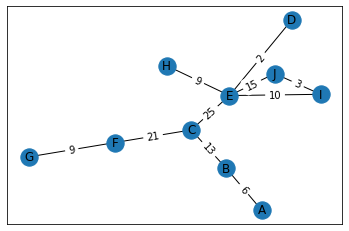

In [4]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own weights.
# (node1, node2, weight)
connection_weight_list = [('B', 'A', 6), 
                          ('B', 'C', 13), 
                          ('C', 'F', 21), 
                          ('C', 'E', 25), 
                          ('E', 'D', 2), 
                          ('G', 'F', 9), 
                          ('E', 'I', 10), 
                          ('E', 'J', 15), 
                          ('I', 'J', '3'), 
                          ('E', 'H', 9)]
# Add edges with its weight.
for n1, n2, w in connection_weight_list:
    G.add_edge(n1, n2, weight=w)
    
# Drawing codes.
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# Get all edge info with sign to draw
edge_info = nx.get_edge_attributes(G,'weight')

nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_info)
plt.show()

### Signed Networks

some networks can carry information about friendship and antagonism based on conflict or disagreement.<br>
EX ) In Epinions and Slashdot people can declare friends and foes. so we can assign some sign to present relationship status using positive and negative for example.

- **Signed Network** : a network where edges are assigned some signs to represent relationship status

you can define edges very simply like when you define weighted network : use attribute `sign` instead of `weight`

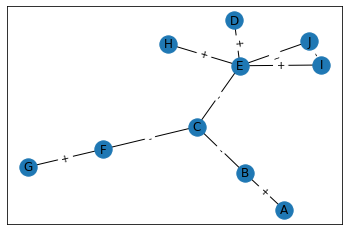

In [5]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own weights.
# (node1, node2, sign)
connection_sign_list = [('B', 'A', '+'), 
                        ('B', 'C', '-'), 
                        ('C', 'F', '-'), 
                        ('C', 'E', '-'), 
                        ('E', 'D', '+'), 
                        ('G', 'F', '+'), 
                        ('E', 'I', '+'), 
                        ('E', 'J', '_'), 
                        ('I', 'J', '-'), 
                        ('E', 'H', '+')]

# Add edges with its weight.
for n1, n2, s in connection_sign_list:
    G.add_edge(n1, n2, sign=s)

# Drawing codes.
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# Get all edge info with sign to draw
edge_info = nx.get_edge_attributes(G,'sign')

nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_info)
plt.show()

### Other Edge Attributes

Edges can carry many oyher labels or attributes.

* **Relationship Labelling**

  edges have colours, which represent the type of relationship that can be 'Family', 'Friend', 'Coworker', and 'Neigbor'
  
we can have any type of attribute when we add these edges, we can give the edge any type of attribute that we want.

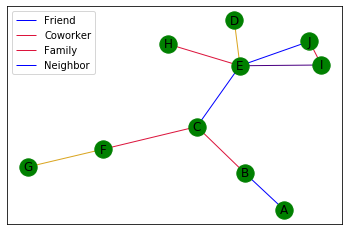

In [6]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own relationship.
# (node1, node2, relationship)
connection_relation_list = [('B', 'A', 'Friend'), 
                            ('B', 'C', 'Coworker'), 
                            ('C', 'F', 'Coworker'), 
                            ('C', 'E', 'Friend'), 
                            ('E', 'D', 'Family'), 
                            ('G', 'F', 'Family'), 
                            ('E', 'I', 'Neighbor'), 
                            ('E', 'J', 'Friend'), 
                            ('I', 'J', 'Coworker'), 
                            ('E', 'H', 'Coworker')]
# Define Relationship color
relationship_color = {'Friend':'blue', 'Coworker':'crimson', 'Family':'goldenrod', 'Neighbor':'indigo'}


# Add edges with its relationship.
for n1, n2, r in connection_relation_list:
    edge_color = relationship_color[r]
    G.add_edge(n1, n2, relation=r, edge_color=edge_color)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# coloring differently by its own relationship
for edge, relation in nx.get_edge_attributes(G, 'relation').items():
    color = relationship_color[relation] # Get relationship color
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = color) # draw edges with given color
    
# annotate relationship colors
plt.legend(relationship_color)        

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='green')
nx.draw_networkx_labels(G,pos)

plt.show()

### Multigraphs

A pair of nopdes can have different types of relationship simultaneously.

* **Muligraph** : A network where multiple edges can connect the same nodes (parallel edges).


Intuition for multigraphs is that for a single pair of of nodes, there is no reason why they shouldn't be able to have many different relationships at the same time.<br>
In this graph, the edges represent some type of relationship between the nodes, which could be family, friend, coworker, or neighbor. 

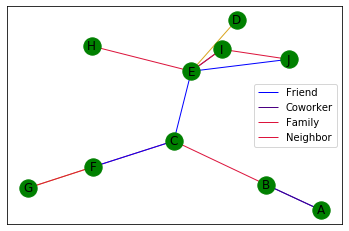

In [7]:
# Define of "Multi" Graph Class
G = nx.MultiGraph()

# make connections with its own relationship.
# (node1, node2, relationship)
connection_relation_list = [('B', 'A', 'Friend'), 
                            ('B', 'A', 'Neighbor'), 
                            ('B', 'C', 'Coworker'), 
                            ('C', 'F', 'Coworker'), 
                            ('C', 'F', 'Friend'), 
                            ('C', 'E', 'Friend'), 
                            ('E', 'D', 'Family'), 
                            ('G', 'F', 'Family'), 
                            ('G', 'F', 'Coworker'), 
                            ('E', 'I', 'Neighbor'), 
                            ('E', 'I', 'Coworker'), 
                            ('E', 'J', 'Friend'), 
                            ('I', 'J', 'Coworker'), 
                            ('E', 'H', 'Coworker')]

# Define Relationship color
relationship_color = {'Friend':'blue', 'Coworker':'crimson', 'Family':'goldenrod', 'Neighbor':'indigo'}


# Add edges with its relationship.
for n1, n2, r in connection_relation_list:
    edge_color = relationship_color[r]
    G.add_edge(n1, n2, relation=r)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# coloring differently by its own relationship
for edge, relation in nx.get_edge_attributes(G, 'relation').items():
    color = relationship_color[relation] # Get relationship color
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = color) # draw edges with given color
    
# annotate relationship colors
plt.legend(relationship_color)        

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='green')
nx.draw_networkx_labels(G,pos)

plt.show()